In [119]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from kneed import KneeLocator
from sklearn.mixture import GaussianMixture

In [120]:

dictonary = pd.read_csv('data-dictionary.csv');
pd.set_option('display.max_colwidth',None)
dictonary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [121]:
country_data=pd.read_csv('Country-data.csv');
country_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [122]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [123]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [124]:
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [125]:
print('Країни з набільшим ВВП на людину')


Країни з набільшим ВВП на людину


In [126]:
country_data.nlargest(15,['gdpp'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400


In [127]:
print('Країни з найменшим ВВП на людину')

Країни з найменшим ВВП на людину


In [128]:
country_data.nsmallest(15,['gdpp'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482


In [129]:
print('Країни з найбільшою середньою тривалістю життя')

Країни з найбільшою середньою тривалістю життя


In [130]:
country_data.nlargest(15,['life_expec'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700
75,Italy,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35800
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600
74,Israel,4.6,35.0,7.63,32.9,29600,1.770,81.4,3.03,30600


In [131]:
print('Країни з найменшою середньою тривалістю життя')

Країни з найменшою середньою тривалістю життя


In [132]:
country_data.nsmallest(15,['life_expec'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
137,South Africa,53.7,28.6,8.94,27.4,12000,6.35,54.3,2.59,7280
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553


C:\Users\Діма\AppData\Local\Temp\ipykernel_11136\2876596715.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = country_data.corr();


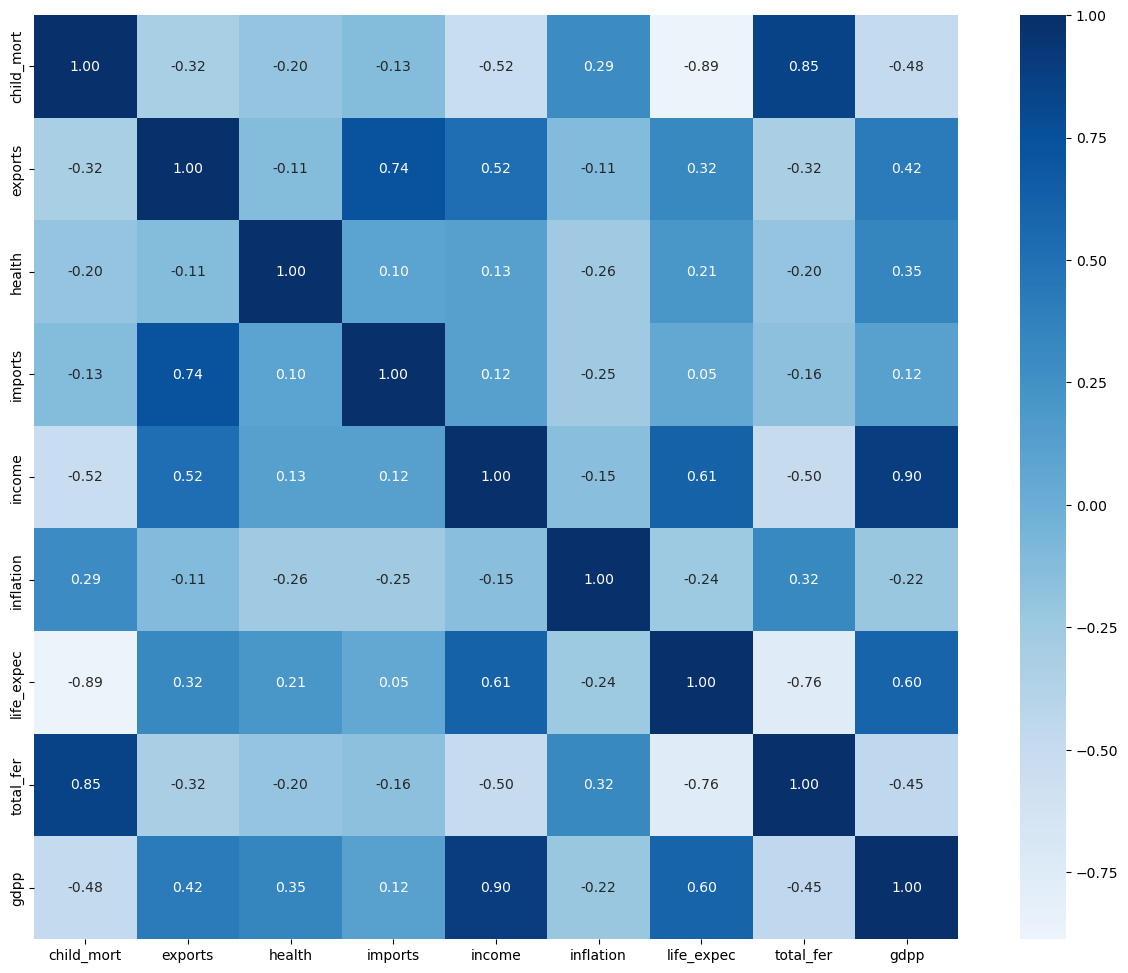

In [133]:
correlations = country_data.corr();
plt.figure(figsize=(16,12))
cmap = sb.color_palette('Blues',as_cmap=True);
map = sb.heatmap(correlations,center=0,annot=True,fmt='.2f',square=True,cmap=cmap)

<AxesSubplot:xlabel='health'>

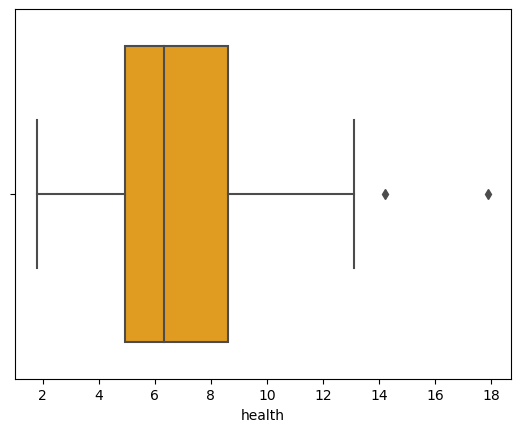

In [134]:
sb.boxplot(x=country_data['health'],color='orange')

<AxesSubplot:xlabel='health', ylabel='Count'>

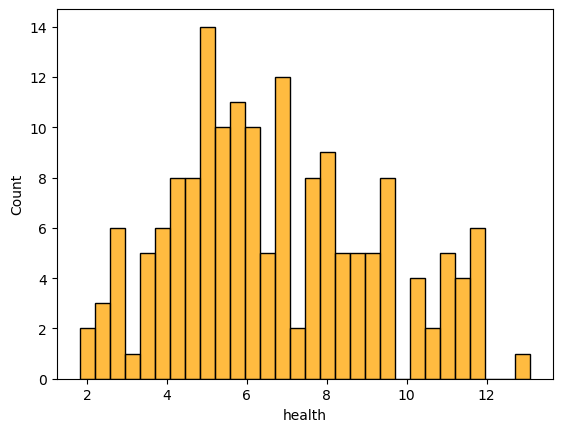

In [135]:
health = country_data[country_data['health']<14]
sb.histplot(data=health, x='health', color="orange", bins = 30)


<AxesSubplot:xlabel='inflation', ylabel='Count'>

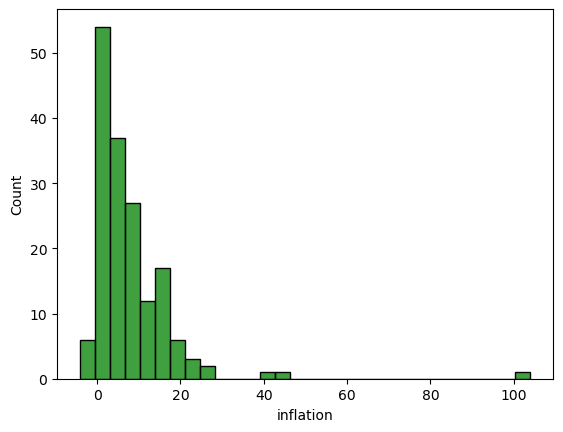

In [136]:
inflation= country_data['inflation']
sb.histplot(data=inflation,color='green',bins=30)

<AxesSubplot:xlabel='inflation', ylabel='Count'>

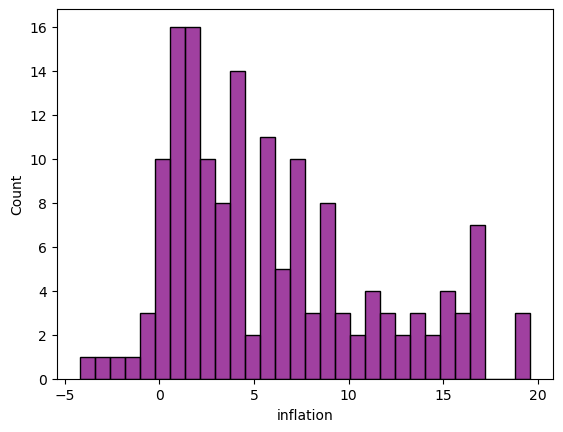

In [137]:
countriesWithLowInflation = country_data[country_data['inflation']<20];
sb.histplot(data=countriesWithLowInflation,x='inflation',color='purple',bins=30)

<AxesSubplot:xlabel='gdpp', ylabel='Count'>

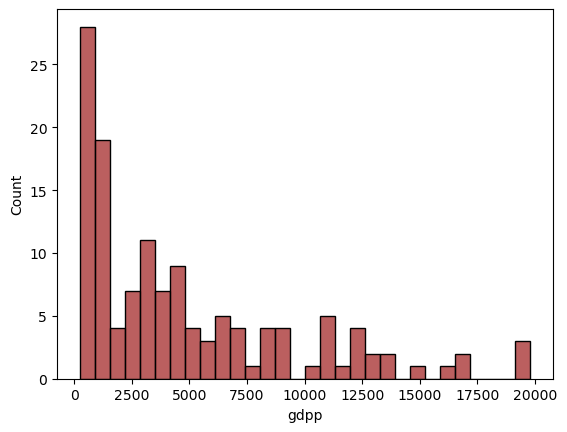

In [138]:
countriesWithLowGDPP= country_data[country_data['gdpp']<20000];
sb.histplot(data=countriesWithLowGDPP,x='gdpp',color='brown',bins=30)

<AxesSubplot:xlabel='child_mort', ylabel='total_fer'>

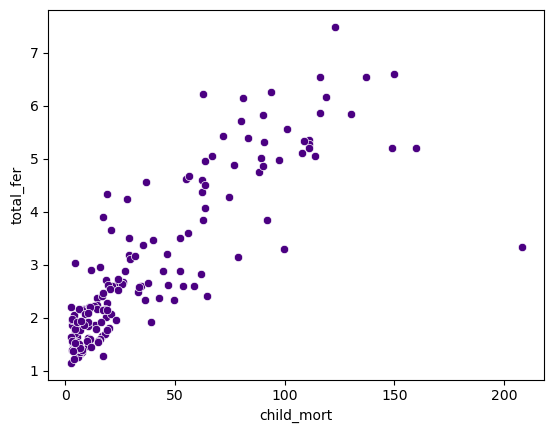

In [139]:
sb.scatterplot(data = country_data, x = "child_mort", y = "total_fer", color = 'indigo')


<AxesSubplot:xlabel='life_expec', ylabel='gdpp'>

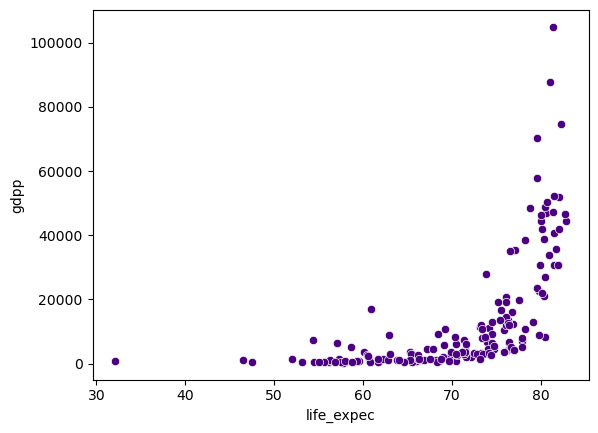

In [140]:
sb.scatterplot(data=country_data, x="life_expec", y="gdpp", color = 'indigo')

<AxesSubplot:xlabel='income', ylabel='gdpp'>

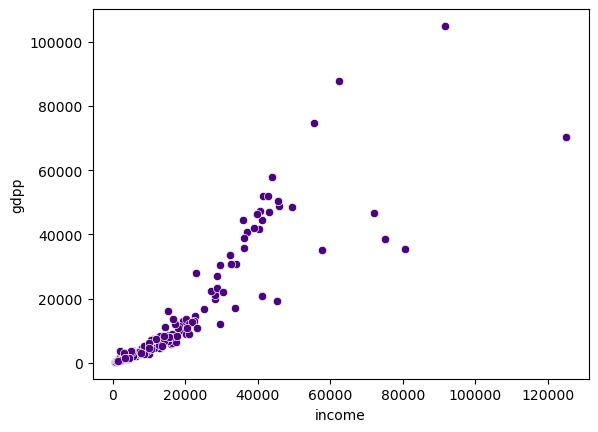

In [141]:
sb.scatterplot(data=country_data, x="income", y="gdpp", color = 'indigo')

<AxesSubplot:xlabel='exports', ylabel='imports'>

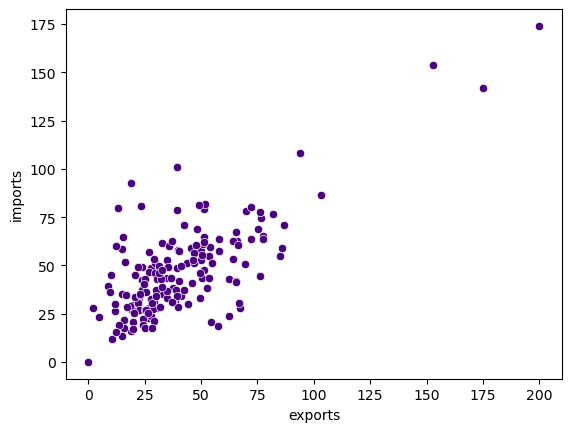

In [142]:
sb.scatterplot(data=country_data, x="exports", y="imports", color = 'indigo')

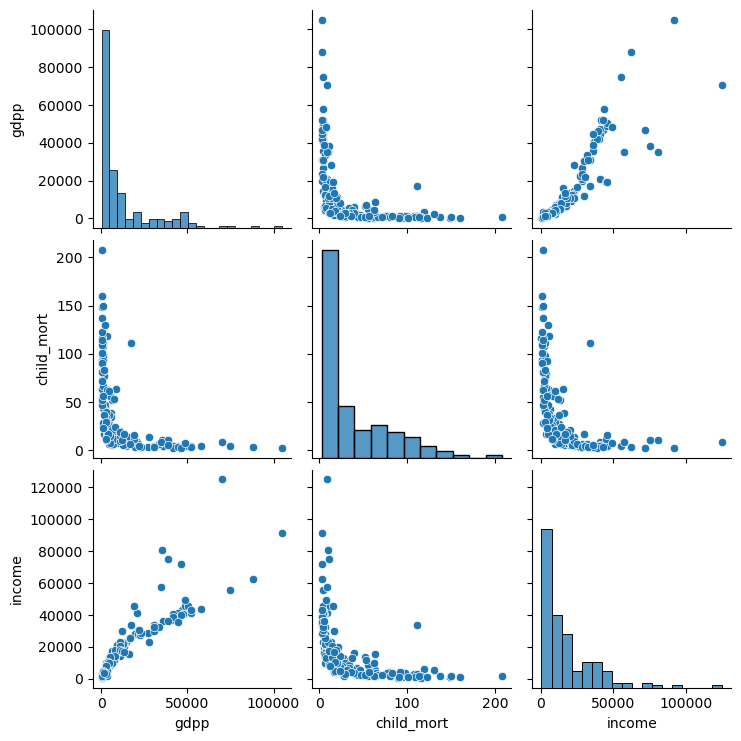

In [143]:

sb.pairplot(country_data[['country', 'gdpp', 'child_mort', 'income']])

In [144]:
cleared_data = country_data[["country",'gdpp','child_mort','income']]
cleared_data = cleared_data[cleared_data['gdpp'] < 45000]
cleared_data = cleared_data[cleared_data['child_mort'] < 120]
cleared_data = cleared_data[cleared_data['income'] < 40000]
cleared_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 166
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     138 non-null    object 
 1   gdpp        138 non-null    int64  
 2   child_mort  138 non-null    float64
 3   income      138 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.4+ KB


C:\ProgramData\Miniconda3\envs\IDA_Lab4\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


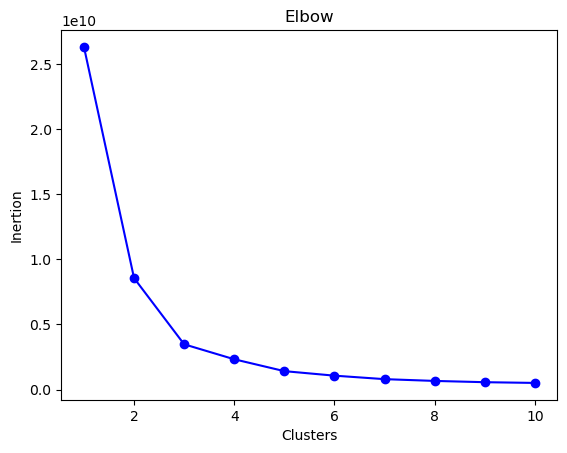

In [145]:
klaster = list(zip(cleared_data["gdpp"],cleared_data["income"]))
inrt = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(klaster)
    inrt.append(kmeans.inertia_)

plt.plot(range(1,11), inrt, marker='o', color = 'blue')
plt.title('Elbow')
plt.xlabel('Clusters')
plt.ylabel('Inertion')
plt.show()

    

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Miniconda3\\envs\\IDA_Lab4\\lib\\site-packages\\matplotlib\\pyplot.py'>

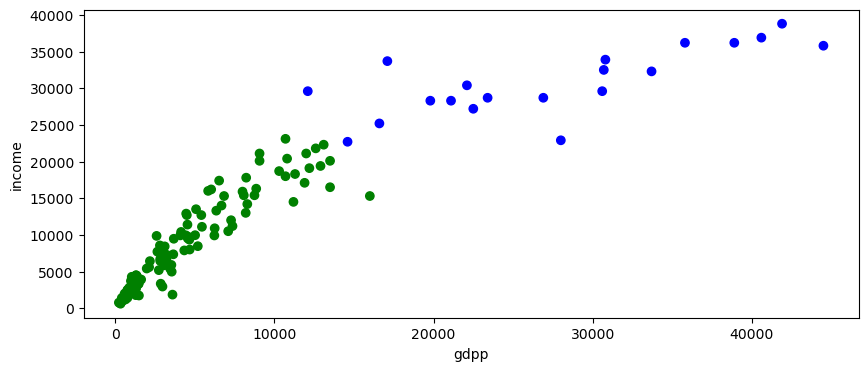

In [146]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(klaster)
plot, x = plt.subplots(figsize=(10,4))
plt.scatter(cleared_data["gdpp"],cleared_data["income"], c=kmeans.labels_, cmap=ListedColormap(['Blue','Green']))
x.set_xlabel('gdpp')
x.set_ylabel('income')
plt


In [147]:
cleared_data.nsmallest(5, ['income', 'gdpp'])

,country,gdpp,child_mort,income
37,"Congo, Dem. Rep.",334,116.0,609
88,Liberia,327,89.3,700
26,Burundi,231,93.6,764
106,Mozambique,419,101.0,918
94,Malawi,459,90.5,1030


C:\ProgramData\Miniconda3\envs\IDA_Lab4\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Miniconda3\\envs\\IDA_Lab4\\lib\\site-packages\\matplotlib\\pyplot.py'>

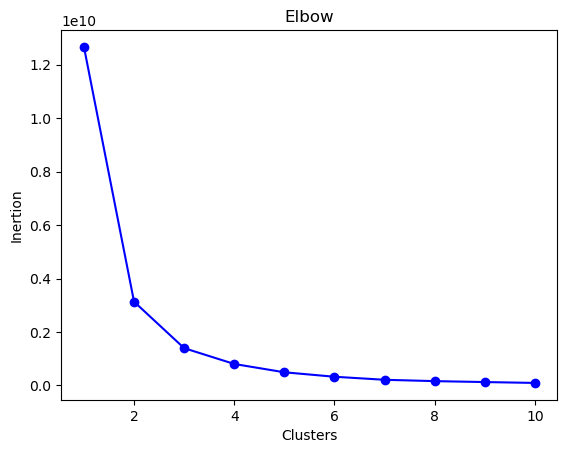

In [148]:
cluster = list(zip(cleared_data["gdpp"], cleared_data["child_mort"]))
inrt = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(cluster)
    inrt.append(kmeans.inertia_)

plt.plot(range(1,11), inrt, marker='o', color='blue')
plt.title('Elbow')
plt.xlabel('Clusters')
plt.ylabel('Inertion')
plt



In [149]:
#Optimization

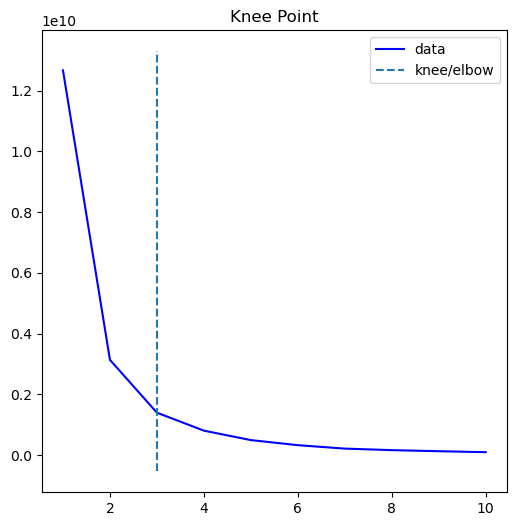

In [150]:
k = KneeLocator(range(1, 11), inrt, curve="convex", direction="decreasing")
k.plot_knee()

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Miniconda3\\envs\\IDA_Lab4\\lib\\site-packages\\matplotlib\\pyplot.py'>

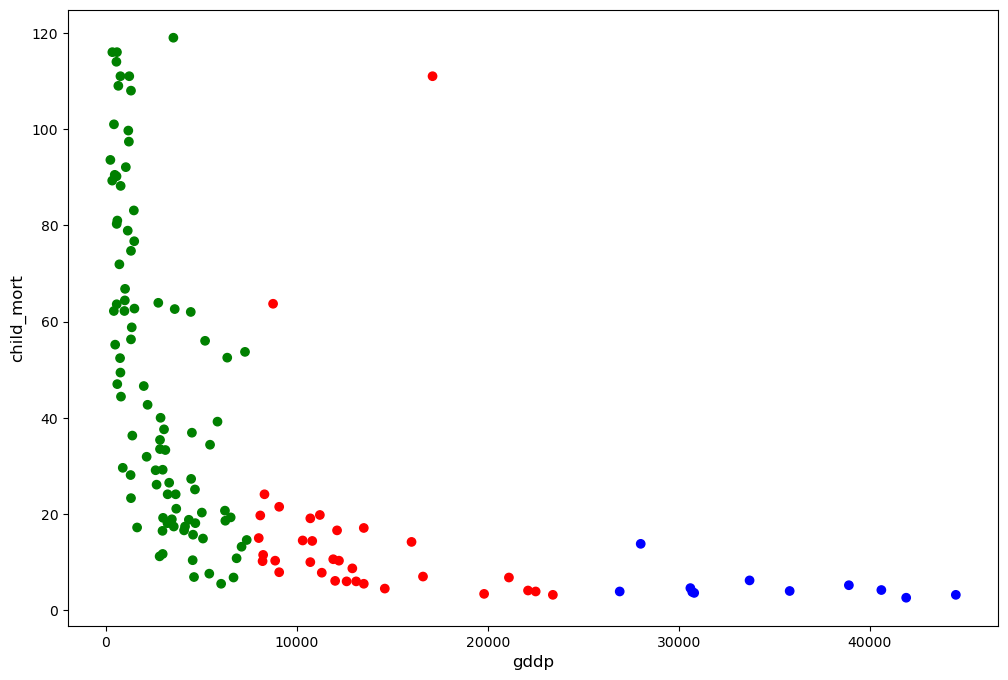

In [151]:

kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster)

plot, pl = plt.subplots(figsize=(12, 8))
plt.scatter(cleared_data["gdpp"],cleared_data["child_mort"], c=kmeans.labels_, cmap = ListedColormap(["red", "green", "blue"]))
pl.set_xlabel('gddp', fontsize=12)
pl.set_ylabel('child_mort', fontsize=12)
plt


In [153]:

cluster_id = cleared_data[['child_mort', 'income']].copy()

gmm_model = GaussianMixture(n_components=3)
gmm_model.fit(cluster_id)
cluster_labels = gmm_model.predict(cluster_id)
cluster_id = pd.DataFrame(cluster_id)
cluster_id['cluster'] = cluster_labels

In [155]:
worstCountries = cleared_data[["country"]]
worstCountries=pd.merge(worstCountries,cluster_id, left_index=True,right_index=True)
worstCountries.nsmallest(5, ['income', 'child_mort'])


,country,child_mort,income,cluster
37,"Congo, Dem. Rep.",116.0,609,2
88,Liberia,89.3,700,2
26,Burundi,93.6,764,2
106,Mozambique,101.0,918,2
94,Malawi,90.5,1030,2


In [160]:
temp=worstCountries['cluster'].value_counts(normalize=True);
temp

0    0.623188
2    0.297101
1    0.079710
Name: cluster, dtype: float64

In [163]:
cm_cluster=pd.DataFrame(cluster_id.groupby(["cluster"]).child_mort.mean())
i_cluster=pd.DataFrame(cluster_id.groupby(["cluster"]).income.mean())
cluster = pd.concat([cm_cluster,i_cluster], axis=1)
cluster.columns = ["child_mort","income"]
cluster


,child_mort,income
cluster,,
0,20.198837,13380.232558
1,14.954545,34209.090909
2,80.360976,2363.195122


In [178]:
rich_country=worstCountries[worstCountries['cluster']==1].sort_values(by='income', ascending=False)
default_country=worstCountries[worstCountries['cluster']==0].sort_values(by='income', ascending=False)
poor_country=worstCountries[worstCountries['cluster']==2].sort_values(by='income', ascending=False)

rich_country

,country,child_mort,income,cluster
68,Iceland,2.6,38800,1
54,France,4.2,36900,1
75,Italy,4.0,36200,1
158,United Kingdom,5.2,36200,1
77,Japan,3.2,35800,1
42,Cyprus,3.6,33900,1
49,Equatorial Guinea,111.0,33700,1
139,Spain,3.8,32500,1
111,New Zealand,6.2,32300,1
138,South Korea,4.1,30400,1


In [179]:
default_country

,country,child_mort,income,cluster
74,Israel,4.6,29600,0
60,Greece,3.9,28700,0
135,Slovenia,3.2,28700,0
43,Czech Republic,3.4,28300,0
98,Malta,6.8,28300,0
...,...,...,...,...
161,Uzbekistan,36.3,4240,0
102,Moldova,17.2,3910,0
162,Vanuatu,29.2,2950,0
83,Kyrgyz Republic,29.6,2790,0


In [180]:
poor_country

,country,child_mort,income,cluster
3,Angola,119.0,5900,2
38,"Congo, Rep.",63.9,5190,2
165,Yemen,56.3,4480,2
69,India,58.8,4410,2
116,Pakistan,92.1,4280,2
84,Lao,78.9,3980,2
107,Myanmar,64.4,3720,2
142,Sudan,76.7,3370,2
101,"Micronesia, Fed. Sts.",40.0,3340,2
99,Mauritania,97.4,3320,2
